In [1]:
import pandas as pd 
import numpy as np
from sklearn.svm import SVC
from sklearn import svm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing

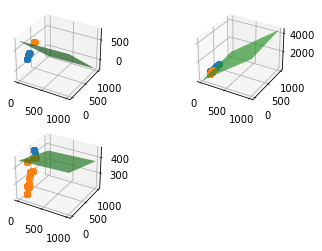

In [2]:
cars=pd.read_csv('cars.ORG.csv')
df=pd.DataFrame(cars)
fig=plt.figure()
for index,i in enumerate([(1,2),(3,1),(2,3)]):
    
    x=df.iloc[:3000,8].values
    y=df.iloc[:3000,16].values
    z=df.iloc[:3000,17].values
    Y=df.iloc[:3000,13].values
    
    le=preprocessing.LabelEncoder()
    Y=le.fit_transform(Y)
    
    x=x[np.logical_or(Y==i[0],Y==i[1])]
    y=y[np.logical_or(Y==i[0],Y==i[1])]
    z=z[np.logical_or(Y==i[0],Y==i[1])]
    Y=Y[np.logical_or(Y==i[0],Y==i[1])]
    
    X= np.c_[x,y,z]
    model=svm.SVC(kernel='linear').fit(X,Y)
    F1 = lambda xx,yy: (-model.intercept_[0]-model.coef_[0][0]*xx-model.coef_[0][1]*yy) / model.coef_[0][2]
    temp = np.linspace(0,1000,100)
    xx,yy=np.meshgrid(temp,temp)
    ax=fig.add_subplot(2,2,index+1,projection='3d')
    ax.plot3D( x[ Y==i[0]] , y[Y==i[0]] , z[ Y==i[0] ] ,'o')
    ax.plot3D( x[ Y==i[1]] , y[Y==i[1]] , z[ Y==i[1] ] ,'o')
    ax.plot_surface(xx,yy,F1(xx,yy))